# Lab | Handling Data Imbalance in Classification Models

Here is the list of steps to be followed (building a simple model without balancing the data):

* Import the required libraries and modules that you would need.

* Read that data into Python and call the dataframe donors.

* Check the datatypes of all the columns in the data.

* Check for null values in the dataframe. Replace the null values using the methods learned in class.

* Split the data into numerical and catagorical. Decide if any columns need their dtype changed.

    * Split the data into a training set and a test set.
    * Scale the features either by using normalizer or a standard scaler.
    * Encode the categorical features using One-Hot Encoding or Ordinal Encoding
    * Fit a logistic regression model on the training data.
    * Check the accuracy on the test data.
    
    
Note: So far we have not balanced the data.

Managing imbalance in the dataset

Check for the imbalance.
Use the resampling strategies used in class for upsampling and downsampling to create a balance between the two classes.
Each time fit the model and see how the accuracy of the model has changed.

* Import the required libraries and modules that you would need.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

pd.set_option('display.max_columns', None)

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns 

* Read that data into Python and call the dataframe donors.

In [3]:
categorical = pd.read_csv('categorical7_02.csv')
numerical = pd.read_csv('numerical7_02.csv')
targets = pd.read_csv('target7_02.csv')

* Check the datatypes of all the columns in the data.

In [4]:
categorical.dtypes

Unnamed: 0      int64
STATE          object
CLUSTER         int64
HOMEOWNR       object
GENDER         object
DATASRCE        int64
SOLIH         float64
VETERANS       object
RFA_2R         object
RFA_2A         object
GEOCODE2       object
DOMAIN_A       object
DOMAIN_B        int64
dtype: object

In [5]:
numerical.dtypes

Unnamed: 0      int64
ODATEDW         int64
TCODE           int64
DOB             int64
AGE           float64
               ...   
AVGGIFT       float64
CONTROLN        int64
HPHONE_D        int64
RFA_2F          int64
CLUSTER2      float64
Length: 323, dtype: object

In [6]:
# I had 1 column extra because I saved the csv wrong, I'm cleaning that here

def drop(df):
    df = df.drop(['Unnamed: 0'],axis=1)
    return df

In [7]:
categorical = drop(categorical)
numerical = drop(numerical)
targets = drop(targets)

* Check for null values in the dataframe. Replace the null values using the methods learned in class.

In [8]:
categorical.isna().sum()

STATE           0
CLUSTER         0
HOMEOWNR        0
GENDER          0
DATASRCE        0
SOLIH       89212
VETERANS    84986
RFA_2R          0
RFA_2A          0
GEOCODE2        0
DOMAIN_A        0
DOMAIN_B        0
dtype: int64

In [9]:
print(categorical['SOLIH'].value_counts(dropna=False))
categorical['VETERANS'].value_counts(dropna=False)

NaN     89212
12.0     5693
0.0       296
1.0        94
2.0        75
3.0        19
4.0        16
6.0         7
Name: SOLIH, dtype: int64


NaN    84986
Y      10426
Name: VETERANS, dtype: int64

In [10]:
# SOLIH | SOLICITATION LIMIT CODE IN HOUSE : It should have values from 0-6 and 12
# we can see that the value 5 is missing so we could fillna with 5, but there are too many of them
categorical['SOLIH'] = categorical['SOLIH'].fillna('other')

In [11]:
# VETERANS it seems to be a YES/NO column so I'm going to fill nans with N
categorical['VETERANS'] = categorical['VETERANS'].fillna('N')

In [12]:
numerical.isna().sum()

ODATEDW     0
TCODE       0
DOB         0
AGE         0
INCOME      0
           ..
AVGGIFT     0
CONTROLN    0
HPHONE_D    0
RFA_2F      0
CLUSTER2    0
Length: 322, dtype: int64

In [13]:
df = pd.DataFrame(numerical.isna().sum()).reset_index()
df.columns = ['column_name', 'nulls']
df[df['nulls']>0]

,column_name,nulls
315,NEXTDATE,9973


C:\Users\Julia\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


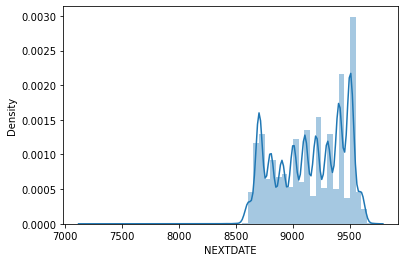

In [14]:
sns.distplot(numerical['NEXTDATE'])
plt.show()


In [15]:
# I'm going to drop the dates columns because they don't give much information about the donation and the numbers
# are encoded so they are YYMM and it won't help my model (pending changing FISTDATE and NEXTDATE with 0 and 1)

num_drop = ['NEXTDATE','FISTDATE','LASTDATE','ODATEDW']

* Split the data into numerical and catagorical. Decide if any columns need their dtype changed.

In [16]:
categorical.nunique()

STATE       12
CLUSTER     53
HOMEOWNR     2
GENDER       3
DATASRCE     4
SOLIH        8
VETERANS     2
RFA_2R       1
RFA_2A       4
GEOCODE2     4
DOMAIN_A     5
DOMAIN_B     4
dtype: int64

In [17]:
# this column is a constant so it doesn't give us any information, I will drop it

categorical['RFA_2R'].value_counts(dropna=False)

L    95412
Name: RFA_2R, dtype: int64

In [18]:
# I will group the 0-6 values, because they are a little portion of the data and it will be easier for encoding after

categorical['SOLIH'].value_counts()

other    89212
12.0      5693
0.0        296
1.0         94
2.0         75
3.0         19
4.0         16
6.0          7
Name: SOLIH, dtype: int64

In [19]:
categorical['SOLIH'] = np.where(categorical['SOLIH'].isin([0,1,2,3,4,6]), '0-6', categorical['SOLIH'] )

In [20]:
categorical['SOLIH'].value_counts()

other    89212
12.0      5693
0-6        507
Name: SOLIH, dtype: int64

In [21]:
categorical = categorical.drop(['RFA_2R'],axis=1)

In [22]:
categorical.columns

Index(['STATE', 'CLUSTER', 'HOMEOWNR', 'GENDER', 'DATASRCE', 'SOLIH',
       'VETERANS', 'RFA_2A', 'GEOCODE2', 'DOMAIN_A', 'DOMAIN_B'],
      dtype='object')

In [23]:
numerical =numerical.drop(num_drop,axis=1)

In [24]:
X = pd.concat([categorical, numerical], axis=1)
y = targets.drop(['TARGET_D'],axis=1)

In [25]:
def logistic_regr(X,y):
    # * Split the data into a training set and a test set.
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
    print(X_train.shape)
    print(X_test.shape)
    print(y_train.shape)
    print(y_test.shape)

    #split numericals - categoricals
    X_train_num = X_train.select_dtypes(np.number)
    X_test_num = X_test.select_dtypes(np.number)
    
    X_train_cat = X_train.select_dtypes(object)
    X_test_cat = X_test.select_dtypes(object)
    
    
# I will join  'DATASRCE','DOMAIN_B' to the categoricals dataframe
# I will keep CLUSTER and CLUSTER2 in the numericals because there are too many of them to encode
# I will drop TCODE because it is a categorical column with lots of different values and it will be hard to encode, if I had the time maybe I could encode it but it's too large
# I will drop DOB because I already have a column for the age
# I will keep RFA_2F in the numericals because I can't find it's meaning, and it is probably a categorical but I can't be sure
    
    X_train_num = X_train_num.drop(['DATASRCE','DOMAIN_B','TCODE','DOB'],axis=1)
    X_test_num = X_test_num.drop(['DATASRCE','DOMAIN_B','TCODE','DOB'],axis=1)
    
    X_train_cat = pd.concat([X_train_cat,X_train['DATASRCE'],X_train['DOMAIN_B']],axis=1)
    X_test_cat = pd.concat([X_test_cat,X_test['DATASRCE'],X_test['DOMAIN_B']],axis=1)
    
    
    
    # * Scale the features either by using normalizer or a standard scaler.
        
    #fit and transform scaling numericals
    minmax = MinMaxScaler().fit(X_train_num) 
    
    X_train_norm = minmax.transform(X_train_num)
    X_test_norm = minmax.transform(X_test_num)
    
    # convert to dataframe again
    X_train_norm = pd.DataFrame(X_train_norm,columns=X_train_num.columns) 
    X_test_norm = pd.DataFrame(X_test_norm,columns=X_test_num.columns) 
    
    # * Encode the categorical features using One-Hot Encoding or Ordinal Encoding
    
    X_train_cat = X_train_cat.astype(str)
    X_test_cat = X_test_cat.astype(str)
    
    #fit and transform encoding categoricals
    onehot = OneHotEncoder(handle_unknown='error', drop='first').fit(X_train_cat) 
    
    X_train_enc = onehot.transform(X_train_cat).toarray()
    X_test_enc = onehot.transform(X_test_cat).toarray()
    
    # convert to dataframe again
    X_train_enc = pd.DataFrame(X_train_enc)
    X_test_enc = pd.DataFrame(X_test_enc)
    
    #ready to fit the model
    X_train_ready = pd.concat([X_train_norm,X_train_enc],axis=1)
    X_test_ready = pd.concat([X_test_norm,X_test_enc],axis=1)
    
    return X_train_ready, X_test_ready, y_train, y_test

In [26]:
X_train_ready, X_test_ready, y_train, y_test = logistic_regr(X,y)

(71559, 329)
(23853, 329)
(71559, 1)
(23853, 1)


    * Fit a logistic regression model on the training data.

In [27]:
X = X_train_ready
y = y_train  

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
kbest = SelectKBest(chi2, k=10).fit_transform(X, y)
# kbest
# Here we choose 10 so that is easier to analyze results later, as we will see
selected = pd.DataFrame(kbest)
selected.head()

C:\Users\Julia\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Julia\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


,0,1,2,3,4,5,6,7,8,9
0,0.010101,0.080808,0.222222,0.000000,0.027397,0.111111,0.666667,1.0,0.0,0.0
1,0.030303,0.070707,0.121212,0.030303,0.020548,0.055556,0.333333,0.0,1.0,0.0
2,0.838384,1.000000,1.000000,0.676768,0.000000,0.027778,0.000000,0.0,0.0,1.0
3,0.010101,0.070707,0.434343,0.000000,0.006849,0.027778,0.000000,0.0,0.0,1.0
4,0.090909,0.151515,0.404040,0.030303,0.143836,0.444444,0.666667,0.0,1.0,0.0


In [28]:
# To check the scores
model = SelectKBest(chi2, k=10).fit(X, y)
df = pd.DataFrame(data = model.scores_, columns = ['score'])
df['Column'] = X_train_ready.columns
print(df.sort_values(by = ['score'], ascending = False).head(20))

C:\Users\Julia\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


          score    Column
315  149.356986    RFA_2F
334   66.298533        17
336   65.462579        19
335   39.055811        18
305   26.878637  CARDGIFT
110   15.946509      HVP1
111   15.205774      HVP2
115   12.177311      HVP6
304   12.061024  NGIFTALL
112   11.487574      HVP3
22    10.320823      ETH2
113    8.216650      HVP4
129    7.939065       RP1
130    7.130402       RP2
348    6.750969        31
318    6.506822         1
299    6.346570  CARDPROM
107    6.109367     ETHC4
108    5.972700     ETHC5
300    5.746043   NUMPROM


In [29]:
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [30]:
cols = df.sort_values(by = ['score'], ascending = False).head(15)['Column']
list(cols)

['RFA_2F',
 17,
 19,
 18,
 'CARDGIFT',
 'HVP1',
 'HVP2',
 'HVP6',
 'NGIFTALL',
 'HVP3',
 'ETH2',
 'HVP4',
 'RP1',
 'RP2',
 31]

In [31]:
cols = ['RFA_2F',
 19,
 17,
 18,
 'HVP1',
 'CARDGIFT',
 31,
 'RP1',
 'HVP4',
 'ETH2']

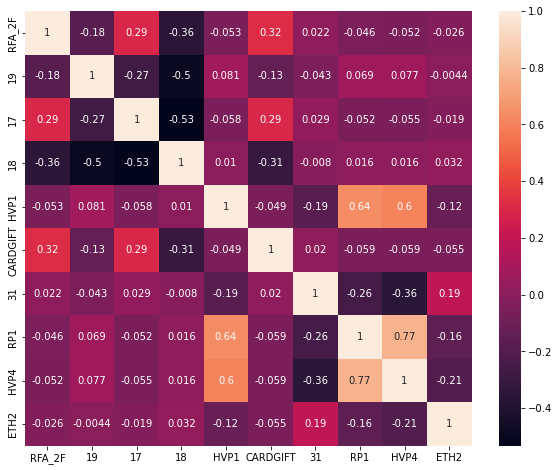

In [32]:
corr_matrix = X_train_ready[list(cols)].corr(method='pearson')  # default
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [78]:
def check_model(X_train, X_test, y_train, y_test):
    
    # * Fit a logistic regression model on the training data.
    
    LR = LogisticRegression(random_state=0, solver='lbfgs')
    model = LR.fit(X_train, y_train)

    # * Check the accuracy on the test data.
    print("score: ",LR.score(X_test, y_test))
    
    
    pred = LR.predict(X_test)

    print("precision: ",precision_score(y_test,pred))
    print("recall: ",recall_score(y_test,pred))
    print("f1: ",f1_score(y_test,pred))
    
    
    print(confusion_matrix(y_test, pred))
    
    return

In [86]:
def check_model_cols(X_train, X_test, y_train, y_test):
    
    # * Fit a logistic regression model on the training data.
    
    LR = LogisticRegression(random_state=0, solver='lbfgs')
    model = LR.fit(X_train[cols], y_train)

    # * Check the accuracy on the test data.
    print("score: ",LR.score(X_test[cols], y_test))
    
    
    pred = LR.predict(X_test[cols])

    print("precision: ",precision_score(y_test,pred))
    print("recall: ",recall_score(y_test,pred))
    print("f1: ",f1_score(y_test,pred))
    
    
    print(confusion_matrix(y_test, pred))
    
    return

In [84]:
check_model(X_train_ready, X_test_ready, y_train, y_test)

C:\Users\Julia\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Julia\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


score:  0.9488533937030982
precision:  0.0
recall:  0.0
f1:  0.0
[[22633     0]
 [ 1220     0]]


C:\Users\Julia\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Julia\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Julia\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [87]:
check_model_cols(X_train_ready, X_test_ready, y_train, y_test)

score:  0.9488533937030982
precision:  0.0
recall:  0.0
f1:  0.0
[[22633     0]
 [ 1220     0]]


C:\Users\Julia\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Julia\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Julia\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Julia\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Us

Note: So far we have not balanced the data.

Managing imbalance in the dataset

Check for the imbalance.
Use the resampling strategies used in class for upsampling and downsampling to create a balance between the two classes.
Each time fit the model and see how the accuracy of the model has changed.

In [38]:
all_data = pd.concat([categorical, numerical,targets.drop(['TARGET_D'],axis=1)], axis=1)

In [39]:
all_data['TARGET_B'].value_counts()

0    90569
1     4843
Name: TARGET_B, dtype: int64

In [40]:
from sklearn.utils import resample

category_0 = all_data[all_data['TARGET_B'] == 0]
category_1 = all_data[all_data['TARGET_B'] == 1]

### Downsampling (undersampling)

In [41]:
category_0_undersampled = resample(category_0, 
                                   replace=False, 
                                   n_samples = len(category_1))

In [42]:
print(category_0_undersampled.shape)
print(category_1.shape)

(4843, 330)
(4843, 330)


In [43]:
data_downsampled = pd.concat([category_0_undersampled, category_1], axis=0)

In [44]:
data_downsampled['TARGET_B'].value_counts()

0    4843
1    4843
Name: TARGET_B, dtype: int64

In [59]:
data_downsampled.shape

(9686, 330)

In [57]:
X_d = data_downsampled.drop(['TARGET_B'],axis=1)
y_d = data_downsampled[['TARGET_B']]

In [58]:
X_train_ready_d, X_test_ready_d, y_train_d, y_test_d = logistic_regr(X_d,y_d)

(7264, 329)
(2422, 329)
(7264, 1)
(2422, 1)


In [79]:
check_model(X_train_ready_d, X_test_ready_d, y_train_d, y_test_d)

C:\Users\Julia\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Julia\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


score:  0.5668868703550785
precision:  0.5660218671152228
recall:  0.5580431177446102
f1:  0.5620041753653445
[[700 516]
 [533 673]]


C:\Users\Julia\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Julia\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Julia\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [88]:
check_model_cols(X_train_ready_d, X_test_ready_d, y_train_d, y_test_d)

score:  0.5755573905862923
precision:  0.5804701627486437
recall:  0.5323383084577115
f1:  0.555363321799308
[[752 464]
 [564 642]]


C:\Users\Julia\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Julia\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Julia\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Julia\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


### Upsampling (oversampling)

In [45]:
category_1_oversampled = resample(category_1, 
                                  replace=True, 
                                  n_samples = len(category_0))

In [46]:
print(category_0.shape)
print(category_1_oversampled.shape)

(90569, 330)
(90569, 330)


In [47]:
data_upsampled = pd.concat([category_0, category_1_oversampled], axis=0)

In [48]:
data_upsampled['TARGET_B'].value_counts()

0    90569
1    90569
Name: TARGET_B, dtype: int64

In [80]:
X_u = data_upsampled.drop(['TARGET_B'],axis=1)
y_u = data_upsampled[['TARGET_B']]

In [81]:
X_train_ready_u, X_test_ready_u, y_train_u, y_test_u = logistic_regr(X_u,y_u)

(135853, 329)
(45285, 329)
(135853, 1)
(45285, 1)


In [82]:
check_model(X_train_ready_u, X_test_ready_u, y_train_u, y_test_u)

C:\Users\Julia\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Julia\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Julia\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _

score:  0.5913878767803908
precision:  0.5958321781720728
recall:  0.569265407028077
f1:  0.5822459023795548
[[13886  8747]
 [ 9757 12895]]


In [89]:
check_model_cols(X_train_ready_u, X_test_ready_u, y_train_u, y_test_u)

C:\Users\Julia\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Julia\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


score:  0.5815612233631445
precision:  0.587578638664207
recall:  0.5483842486314674
f1:  0.5673052770990797
[[13914  8719]
 [10230 12422]]


C:\Users\Julia\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Julia\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
